In [55]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context("talk")
import pandas as pd
from matplotlib.colors import LogNorm
from glob import glob
import os
import importlib
import pyagn
importlib.reload(pyagn)
from pyagn import sed
import plotting
from qwind import constants, wind, radiation, aux_numba
importlib.reload(constants)
importlib.reload(wind)
importlib.reload(radiation)
importlib.reload(aux_numba)

<module 'qwind.aux_numba' from '/home/arnau/Documents/qwind/qwind/aux_numba.py'>

In [62]:
qw = wind.Qwind(radiation_mode = "QSOSED", r_in = "auto")

r_in: 17.803971 
 r_out: 1354.415129


In [60]:
line = qw.line(r_0 = 375)

In [61]:
%%time
line.iterate(niter = 5000)

Failed wind! 


CPU times: user 3.02 s, sys: 196 ms, total: 3.22 s
Wall time: 3.01 s


In [63]:
qw.start_lines(niter = 50000)

Starting line iteration
Line 1 of 20


Failed wind! 


Line 2 of 20


Failed wind! 


Line 3 of 20


Failed wind! 


Line 4 of 20


Failed wind! 


Line 5 of 20


Failed wind! 


Line 6 of 20


Failed wind! 


Line 7 of 20


Failed wind! 


Line 8 of 20


Failed wind! 


Line 9 of 20


Failed wind! 

Line 10 of 20


Failed wind! 

Line 11 of 20


Failed wind! 

Line 12 of 20


Failed wind! 

Line 13 of 20


Failed wind! 

Line 14 of 20


Failed wind! 

Line 15 of 20


Failed wind! 

Line 16 of 20


Failed wind! 

Line 17 of 20


Failed wind! 

Line 18 of 20


Failed wind! 

Line 19 of 20


/home/arnau/Documents/qwind/qwind/aux_numba.py:144: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  phi_int = quad(integration_quad_r_phid, 0., np.pi, args = (r_d, r, z))[0]


Failed wind! 

Line 20 of 20


Failed wind! 

No wind escapes


In [64]:
old = wind.Qwind(radiation_mode = "SimpleSed")

r_in: 200.000000 
 r_out: 1600.000000


In [65]:
old.start_lines(niter = 50000)

Starting line iteration
Line 1 of 20


Failed wind! 

Line 2 of 20


Failed wind! 

Line 3 of 20


escape velocity reached.
out of grid 

Line 4 of 20


Failed wind! 

Line 5 of 20


Failed wind! 

Line 6 of 20


Failed wind! 

Line 7 of 20


Failed wind! 

Line 8 of 20


Failed wind! 

Line 9 of 20


Failed wind! 

Line 10 of 20


Failed wind! 

Line 11 of 20


Failed wind! 

Line 12 of 20


Failed wind! 

Line 13 of 20


Failed wind! 

Line 14 of 20


Failed wind! 

Line 15 of 20


/home/arnau/Documents/qwind/qwind/aux_numba.py:165: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  phi_int = quad(integration_quad_r_phid, 0., np.pi, args = (r_d, r, z))[0]


Failed wind! 

Line 16 of 20


Failed wind! 

Line 17 of 20


Failed wind! 

Line 18 of 20


Failed wind! 

Line 19 of 20


Failed wind! 

Line 20 of 20


Failed wind! 



In [66]:
lines = qw.lines
lines_old = old.lines

(10, 50)

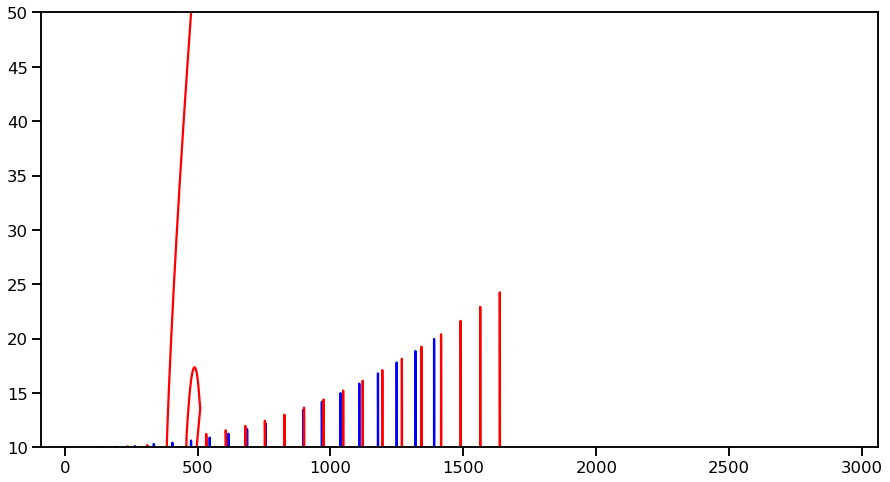

In [71]:
plt.figure(figsize=(15,8))
for line in lines:
    plt.plot(line.r_hist, line.z_hist, color = 'b')
for line_old in lines_old:
    plt.plot(line_old.r_hist, line_old.z_hist, color = 'r')
plt.ylim(10,50)

In [16]:
bh = sed.SED(M = 1e8, mdot = 0.5)

In [3]:
fraction_list = bh.compute_uv_fractions(1e26, include_corona=True)
r_range = np.linspace(bh.corona_radius, bh.gravity_radius, len(fraction_list))

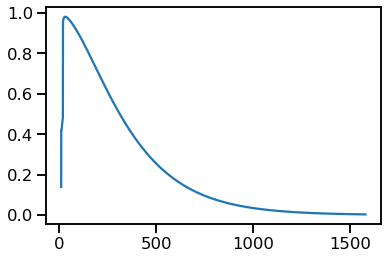

In [5]:
plt.plot(r_range, fraction_list)

In [6]:
from scipy import interpolate

In [9]:
interpol = interpolate.interp1d(x = r_range, y = fraction_list, fill_value = 0, bounds_error=False)

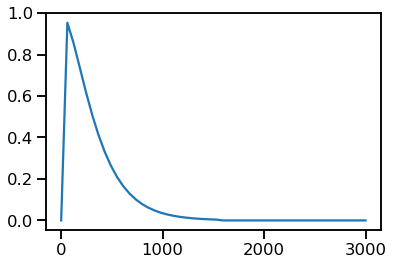

In [13]:
r_range_test = np.linspace(0, 3000)
plt.plot(r_range_test, interpol(r_range_test))